<IPython.core.display.Javascript object>


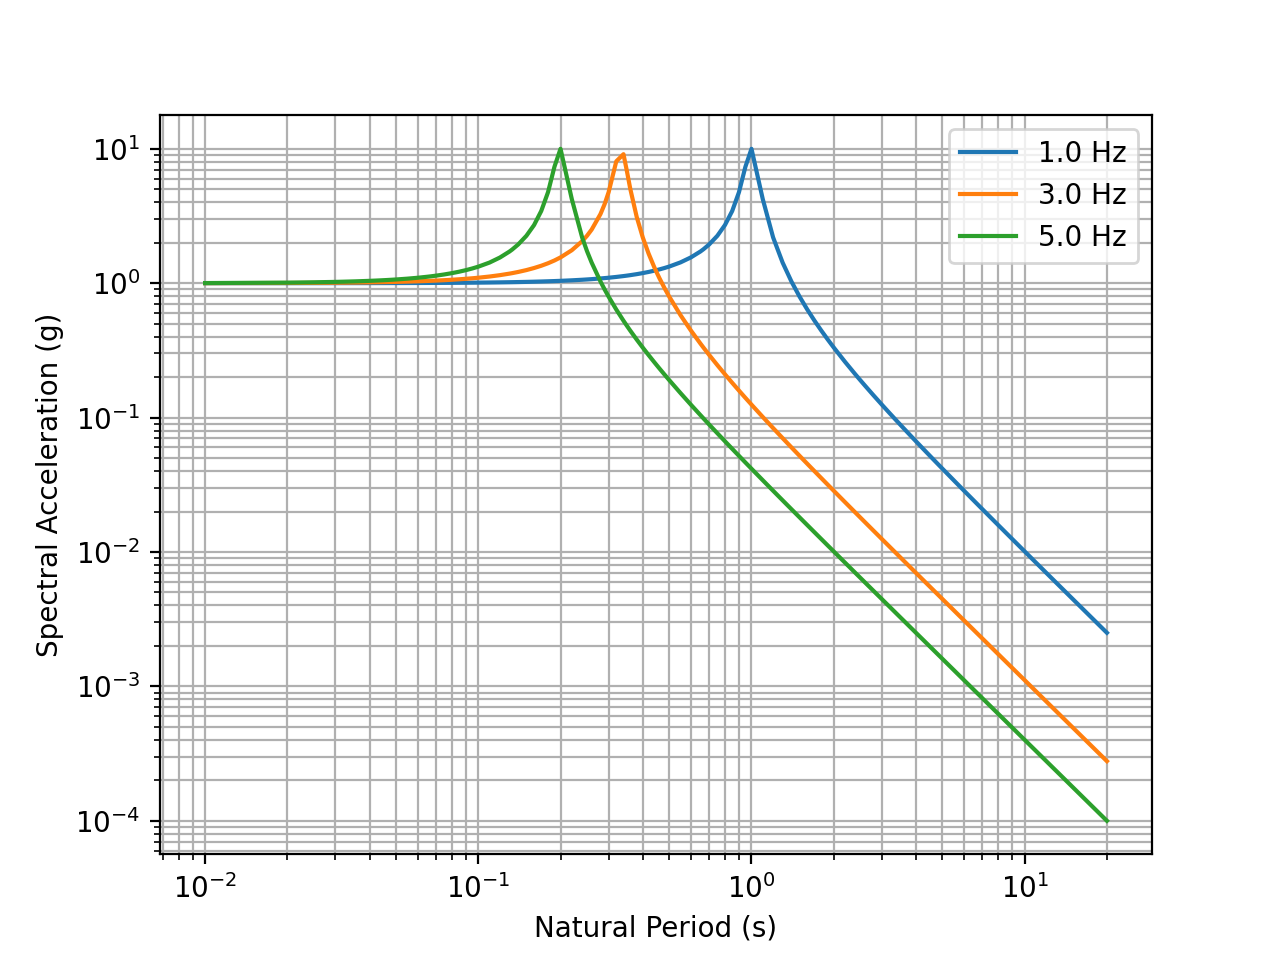

In [1]:
%matplotlib notebook
import numpy as np
from ucla_geotech_tools import response_spectrum as ars
import matplotlib.pyplot as plt

N = 4000               # Number of time steps
M = 3                  # Number of motions
dt = 0.005             # Time step in seconds
D = 0.05               # Damping
freq = [1.0, 3.0, 5.0] # Frequencies for three different harmonic motions

motions = np.empty([M,N],dtype="float64")
for i in range(M):
    for j in range(N):
        motions[i][j] = np.sin(2*np.pi*freq[i]*j*dt)

T = ars.get_ngawest2_T()
Sa = ars.get_response_spectrum(motions=motions, dt=dt, D=D, zeropad=0, verbose=0) # returns Python array containing pseudo-spectral acceleration values 

for i in range(M):
    plt.loglog(T,Sa[i],label=str(freq[i])+" Hz")
plt.xlabel('Natural Period (s)')
plt.ylabel('Spectral Acceleration (g)')
plt.legend()
plt.grid(True,which='both')
plt.savefig('spectral_acceleration.png')


<IPython.core.display.Javascript object>


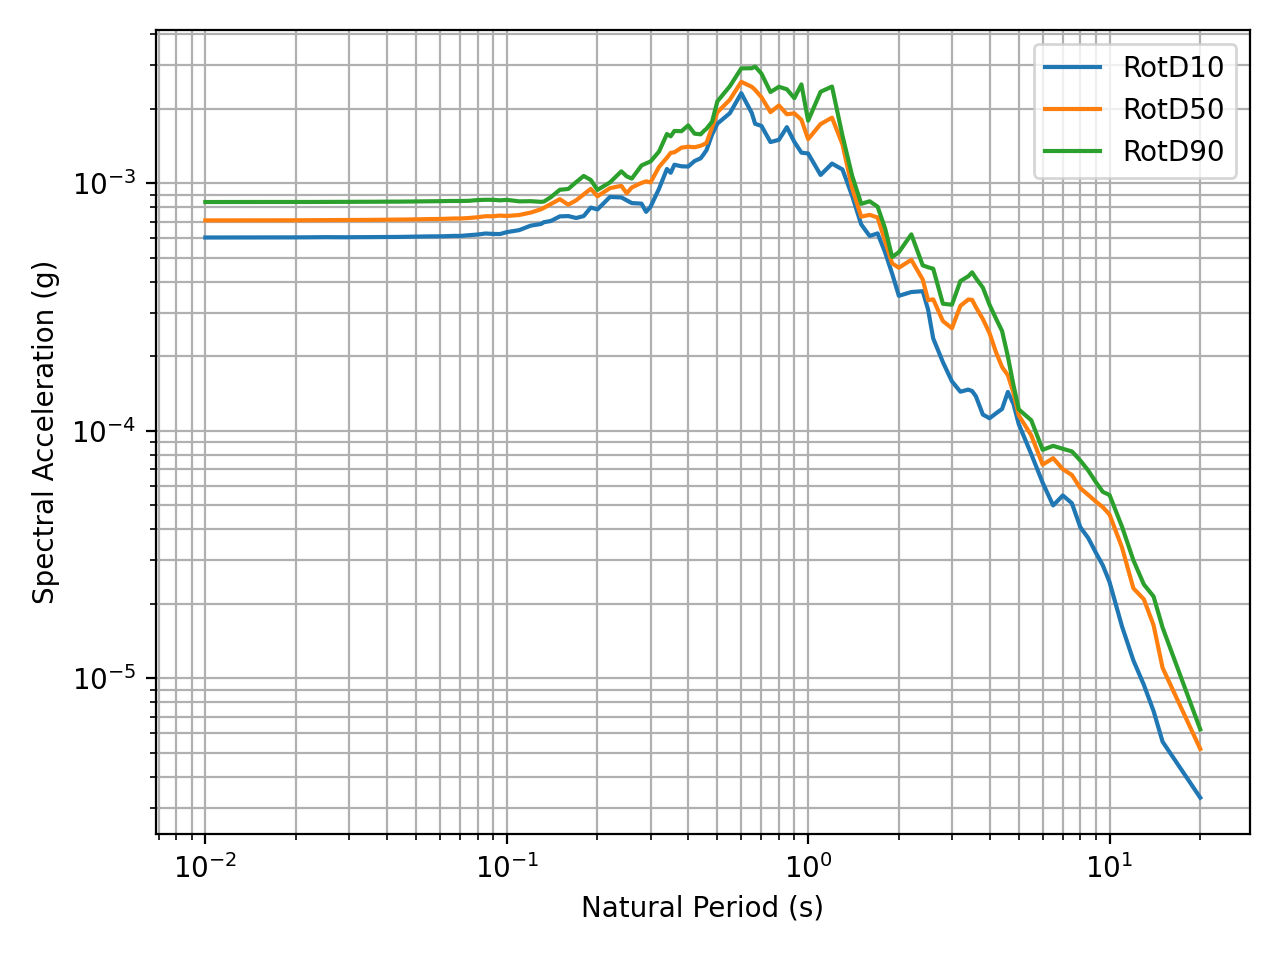

In [8]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import ucla_geotech_tools.response_spectrum as ars
import pandas as pd

D = 0.05  # Damping
motion1 = pd.read_csv('20210102144223_BK_BDM_HHE.txt',sep=' ', names=['time (s)', 'acc (g)'])
motion2 = pd.read_csv('20210102144223_BK_BDM_HHN.txt',sep=' ', names=['time (s)', 'acc (g)'])
acc1 = motion1['acc (g)'].values
acc2 = motion2['acc (g)'].values
time = motion1['time (s)'].values
dt = time[1] - time[0]

motions = [acc1, acc2]
T = ars.get_ngawest2_T()
RotD = [10, 50, 90]  # Specify 10th, 50th, and 90th percentiles
Sa = ars.get_response_spectrum(motions=motions, dt=dt, D=D, zeropad=0, verbose=0, RotD=RotD) # returns Python array containing pseudo-spectral acceleration values for each specified RotD percentile 

for rotd, sa in zip(RotD,Sa.T):
    plt.loglog(T,sa,label="RotD"+str(int(rotd)))
    
plt.xlabel('Natural Period (s)')
plt.ylabel('Spectral Acceleration (g)')
plt.legend()
plt.grid(True,which='both')
plt.tight_layout()